In [27]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [28]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US.dropna(subset='salary_year_avg', inplace=True)

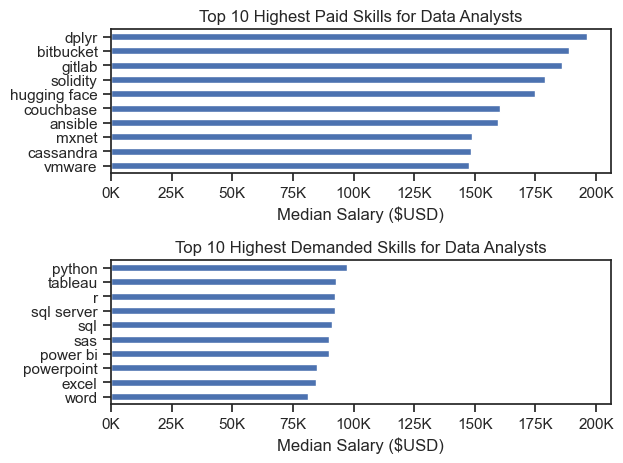

In [29]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']]
df_skills = df_DA_US.groupby(by='job_skills')['salary_year_avg'].agg(
    count = 'size', 
    median = 'median'
    )

df_top_demand = df_skills.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

df_top_pay = df_skills.sort_values(by='median', ascending=False).head(10)

fig, ax = plt.subplots(2,1)

df_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))

df_top_demand[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Highest Demanded Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

### Barplot using Seaborn

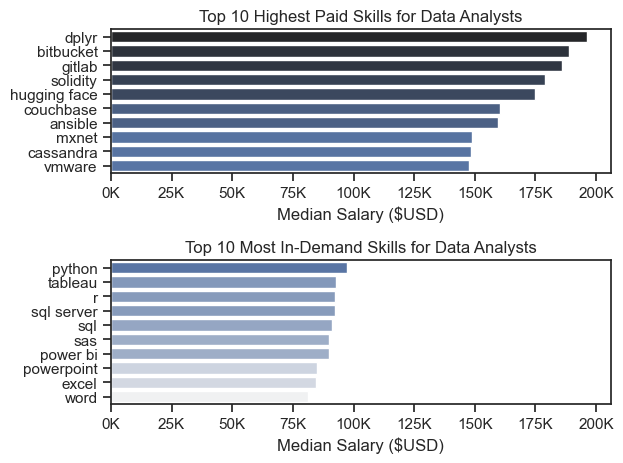

In [30]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style="ticks")

#Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r',legend=False )
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))

#Top 10 Most In-Demand for Data Analysts
sns.barplot(data=df_top_demand, x='median', y=df_top_demand.index, ax=ax[1], hue='median',palette='light:b', legend=False )
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{(x/1000):.0f}K'))
ax[1].set_xlim(ax[0].get_xlim())

plt.tight_layout()
plt.show()

### Histograms using Seaborn

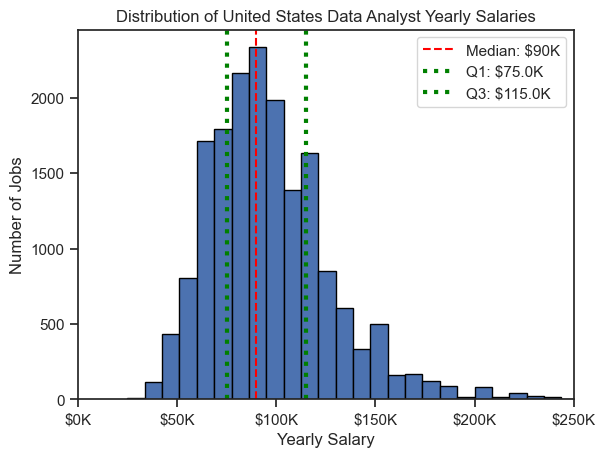

In [31]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', label='')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

median_salary = df_DA_US['salary_year_avg'].median()
plt.axvline(median_salary, color = 'red', linestyle ='dashed', linewidth = 1.5, label=f'Median: ${int(median_salary/1000)}K')

quantile_25 = df_DA_US['salary_year_avg'].quantile(0.25)
plt.axvline(quantile_25, color='green', linestyle=':', linewidth=3, label=f'Q1: ${int(quantile_25)/1000}K')

quantile_75 = df_DA_US['salary_year_avg'].quantile(0.75)
plt.axvline(quantile_75, color='green', linestyle=':', linewidth=3, label=f'Q3: ${int(quantile_75)/1000}K')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()

C:\Users\rabel\AppData\Local\Temp\ipykernel_18924\1598660155.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


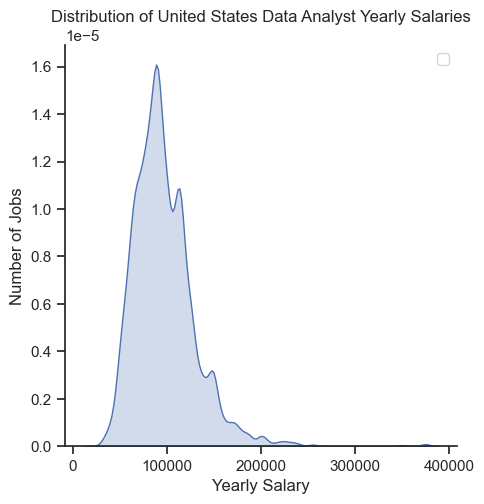

In [34]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()

### Boxplot using Seaborn

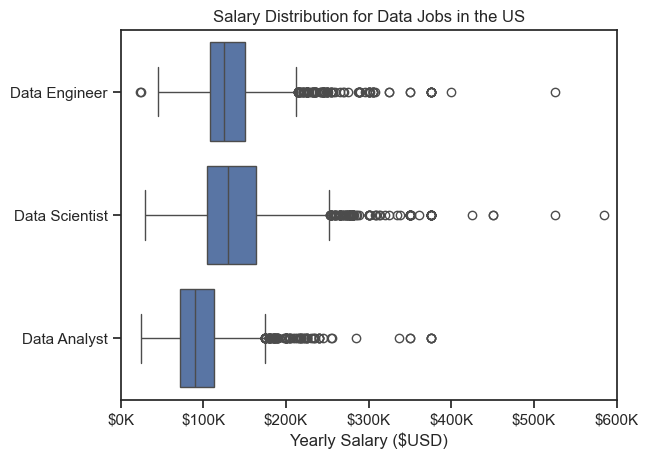

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US.dropna(subset=['salary_year_avg'], inplace=True)

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.title('Salary Distribution for Data Jobs in the US')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${(x/1000):.0f}K'))
plt.xlim(0,600000)
plt.show()
